In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import uncertainties as u

In [62]:
directory = './csvs_of_fits/'

In [63]:
big_df = pd.DataFrame(columns=['set', 'e', 'calo', 'diff', 'err'])

In [64]:
def get_diffs(filename):
    e_low = float(filename[3:6])
    e_range = "{0}-{1}".format(int(e_low*1000), int(e_low*1000+100))
    set_name = filename[:2]

    this_df = pd.read_csv(directory+filename)
    diffs_df = pd.DataFrame(columns=['set', 'e', 'calo', 'diff', 'err'])

    for index in range(0, 24):
        m = u.ufloat(this_df.loc[index]['m'], this_df.loc[index]['m_err'])
        c = u.ufloat(this_df.loc[index]['c'], this_df.loc[index]['c_err'])

        y_40 = m*40+c
        y_90 = m*90+c
        y_diff = y_40-y_90
        
        diffs_df.loc[index] = {'set':set_name,
                               'e':e_range,
                               'calo':this_df.loc[index]['caloNum'],
                               'diff':y_diff.nominal_value,
                               'err':y_diff.std_dev}
        
    return diffs_df

In [65]:
for filename in os.listdir(directory):
    if (filename[-4:] != '.csv'):
        continue
    e_low = float(filename[3:6])
    if ((e_low <= 0.8) and (e_low >= 0.5)):
        big_df = big_df.append(get_diffs(filename), ignore_index=True)

In [66]:
big_df.to_csv('./y_diffs_results/y_diffs.csv')

<ErrorbarContainer object of 3 artists>

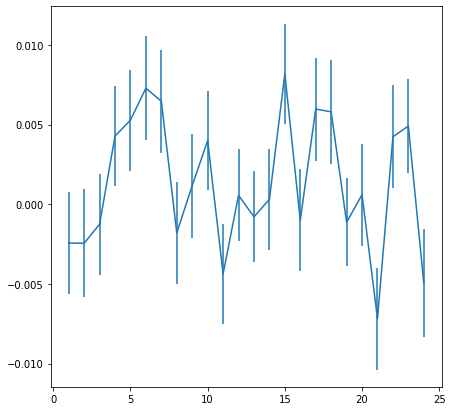

In [70]:
memes = big_df[(big_df['set'] == '1C') & (big_df['e'] == '800-900')]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

ax.errorbar(memes['calo'], memes['diff'], yerr=memes['err'])